Notebook for processing Zotero refs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

Matplotlib is building the font cache; this may take a moment.


In [13]:
dataset_folder = "data"
file = "unsupervised_collection.csv"

df = pd.read_csv(os.path.join(dataset_folder,file))

In [ ]:
df["Manual Tags"] = df["Manual Tags"].fillna("")
df["TagList"] = df["Manual Tags"].apply(lambda x: [tag.strip() for tag in x.split(";") if tag.strip()])

In [16]:
model_tags = ["CNN", "LSTM", "Transformer", "GRU", "GAN", "NN", "DBN", "RBM", "RNN"]

In [17]:
df["FilteredTags"] = df["TagList"].apply(lambda tags: [tag for tag in tags if tag in model_tags])

In [18]:
# Crear una nueva tabla expandida: una fila por (paper, modelo)
df_expanded = df.explode("FilteredTags")

# Renombrar la columna expandida para mayor claridad
df_expanded = df_expanded.rename(columns={"FilteredTags": "ModelTag"})

In [21]:
# Suponemos que el año está en una columna "Year"
df_expanded["Year"] = pd.to_numeric(df_expanded["Publication Year"], errors="coerce")
df_expanded = df_expanded.dropna(subset=["Year"])
df_expanded["Year"] = df_expanded["Year"].astype(int)

/var/folders/wg/mn_h00qd38bbjg_l2y1rt5kc0000gq/T/ipykernel_17540/1583878614.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_expanded["Year"] = df_expanded["Year"].astype(int)


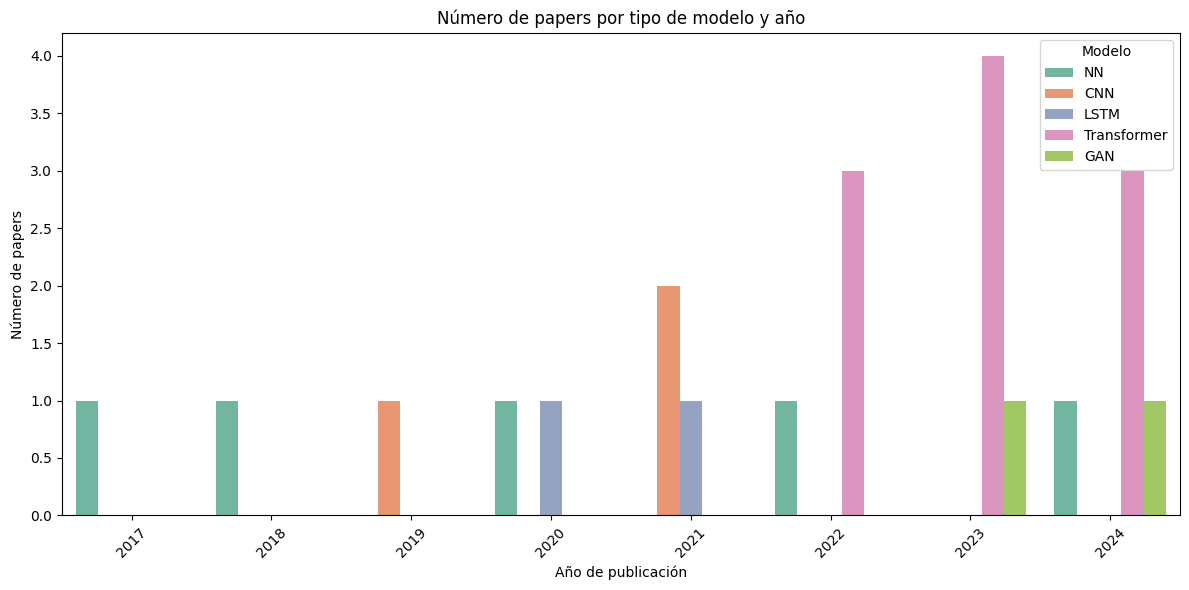

In [25]:
plt.figure(figsize=(12,6))
sns.countplot(data=df_expanded, x="Year", hue="ModelTag", palette="Set2")
plt.title("Número de papers por tipo de modelo y año")
plt.xlabel("Año de publicación")
plt.ylabel("Número de papers")
plt.xticks(rotation=45)
plt.legend(title="Modelo")
plt.tight_layout()
plt.show()

In [31]:
# Crear una tabla pivotada para acumular los tipos de modelo por año
df_pivot = df_expanded.pivot_table(index="Publication Year", columns="ModelTag", aggfunc="size", fill_value=0)

# Asegurarse de que el índice sea de tipo entero (en lugar de float)
df_pivot.index = df_pivot.index.astype(int)

In [33]:
# Configurar estilo de gráfico para publicaciones científicas
sns.set_context("paper", font_scale=1.2)
sns.set_style("whitegrid")

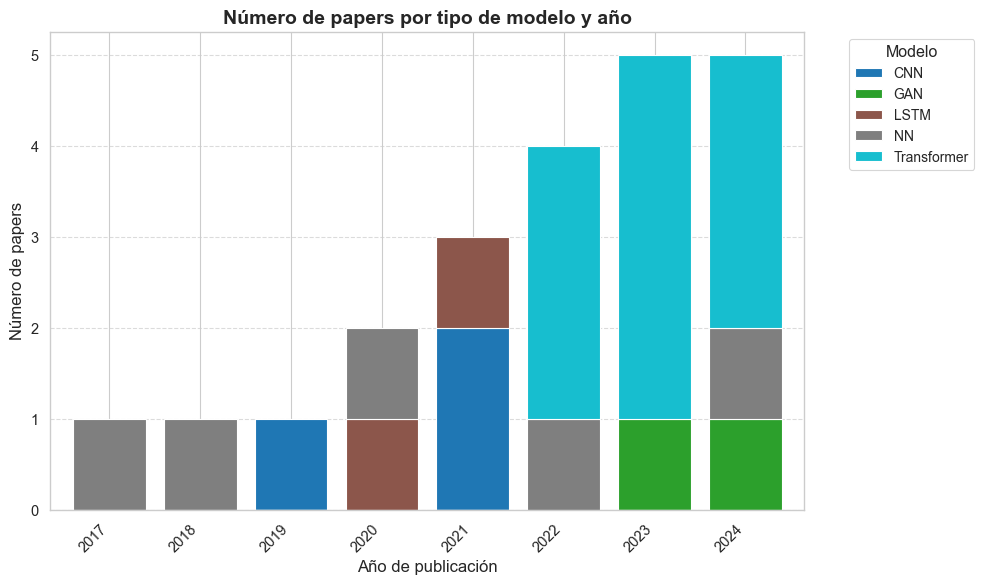

In [34]:
# Crear el gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(10, 6))
df_pivot.plot(kind="bar", stacked=True, ax=ax, width=0.8, cmap="tab10")

# Ajustar etiquetas y título
ax.set_title("Número de papers por tipo de modelo y año", fontsize=14, weight="bold")
ax.set_xlabel("Año de publicación", fontsize=12)
ax.set_ylabel("Número de papers", fontsize=12)
ax.set_xticks(range(len(df_pivot.index)))
ax.set_xticklabels(df_pivot.index, rotation=45, ha="right")

# Ajustar leyenda
ax.legend(title="Modelo", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10)
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Ajustar márgenes
plt.tight_layout()
plt.show()

Supervised collection


In [35]:
dataset_folder = "data"
file = "supervised_collection.csv"

df_supervised = pd.read_csv(os.path.join(dataset_folder,file))

In [36]:
df_supervised["Manual Tags"] = df_supervised["Manual Tags"].fillna("")
df_supervised["TagList"] = df_supervised["Manual Tags"].apply(lambda x: [tag.strip() for tag in x.split(";") if tag.strip()])

In [37]:
model_tags = ["CNN", "LSTM", "Transformer", "GRU", "GAN", "NN", "DBN", "RBM", "RNN", "SVM"]

In [39]:
df_supervised["FilteredTags"] = df_supervised["TagList"].apply(lambda tags: [tag for tag in tags if tag in model_tags])

In [40]:
# Crear una nueva tabla expandida: una fila por (paper, modelo)
df_supervised_expanded = df_supervised.explode("FilteredTags")

# Renombrar la columna expandida para mayor claridad
df_supervised_expanded = df_supervised_expanded.rename(columns={"FilteredTags": "ModelTag"})

In [41]:
# Crear una tabla pivotada para acumular los tipos de modelo por año
df_pivot_supervised = df_supervised_expanded.pivot_table(index="Publication Year", columns="ModelTag", aggfunc="size", fill_value=0)

# Asegurarse de que el índice sea de tipo entero (en lugar de float)
df_pivot_supervised.index = df_pivot_supervised.index.astype(int)

In [42]:
# Configurar estilo de gráfico para publicaciones científicas
sns.set_context("paper", font_scale=1.2)
sns.set_style("whitegrid")

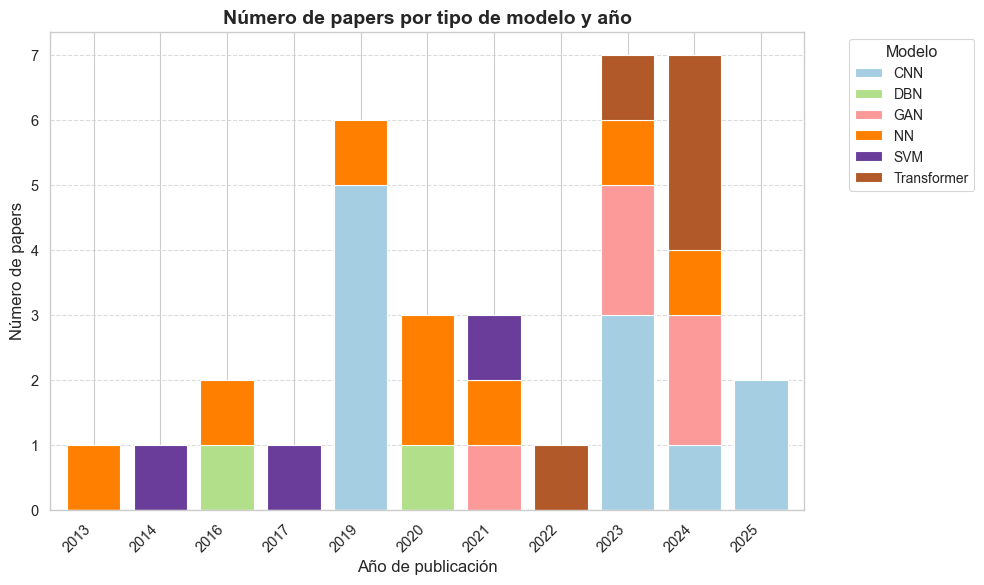

In [45]:
# Crear el gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(10, 6))
df_pivot_supervised.plot(kind="bar", stacked=True, ax=ax, width=0.8, cmap="Paired")

# Ajustar etiquetas y título
ax.set_title("Número de papers por tipo de modelo y año", fontsize=14, weight="bold")
ax.set_xlabel("Año de publicación", fontsize=12)
ax.set_ylabel("Número de papers", fontsize=12)
ax.set_xticks(range(len(df_pivot_supervised.index)))
ax.set_xticklabels(df_pivot_supervised.index, rotation=45, ha="right")

# Ajustar leyenda
ax.legend(title="Modelo", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10)
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Ajustar márgenes
plt.tight_layout()
plt.show()

Both supervised and unsupervised

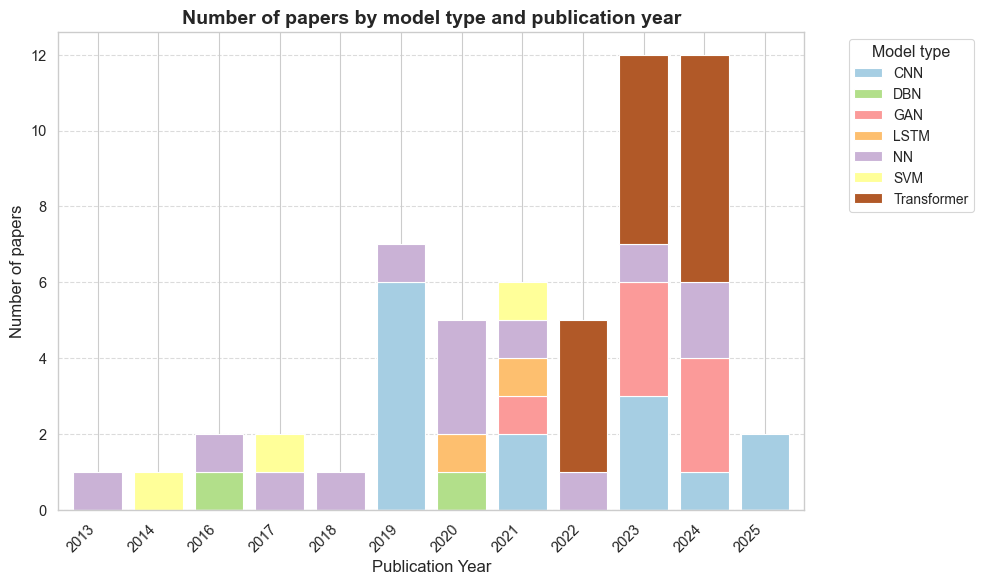

In [48]:
# Combinar los DataFrames de supervisado y no supervisado
df_combined = pd.concat([df_expanded, df_supervised_expanded], ignore_index=True)

# Crear una tabla pivotada para acumular los tipos de modelo por año
df_pivot_combined = df_combined.pivot_table(index="Publication Year", columns="ModelTag", aggfunc="size", fill_value=0)
df_pivot_combined.index = df_pivot_combined.index.astype(int)
# Configurar estilo de gráfico para publicaciones científicas
sns.set_context("paper", font_scale=1.2)
sns.set_style("whitegrid")

# Crear el gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(10, 6))
df_pivot_combined.plot(kind="bar", stacked=True, ax=ax, width=0.8, cmap="Paired")

# Ajustar etiquetas y título
ax.set_title("Number of papers by model type and publication year", fontsize=14, weight="bold")
ax.set_xlabel("Publication Year", fontsize=12)
ax.set_ylabel("Number of papers", fontsize=12)
ax.set_xticks(range(len(df_pivot_combined.index)))
ax.set_xticklabels(df_pivot_combined.index, rotation=45, ha="right")

# Ajustar leyenda
ax.legend(title="Model type", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10)
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Ajustar márgenes
plt.tight_layout()
plt.show()